In [2]:
import pandas as pd
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
new_col1 = []
new_col0 = []
m1 = max(df['Glucose'])
m2 = min(df['Glucose'])
for i in range(len(df)):
    if df['Outcome'][i] == 1:
        new_col1.append((df['Glucose'][i]/m1)*100)
    else:
        new_col1.append((50/m1)*100)
df_new = pd.DataFrame(new_col1, columns = ['Rank'])
o, z = 0, 0
# for i in new_col1:
#     if i[0] == 1 and i[1] > 50:
#         o += 1
#     elif i[0] == 0 and i[1] < 50:
#         z += 1
        
# o, z

In [6]:
df_new.head()

,Rank
0,74.371859
1,25.125628
2,91.959799
3,25.125628
4,68.844221


In [7]:
new_df = pd.concat([df['Glucose'], df_new['Rank']], axis = 1, join = 'inner')

In [8]:
new_df.head()

,Glucose,Rank
0,148,74.371859
1,85,25.125628
2,183,91.959799
3,89,25.125628
4,137,68.844221


In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
X = new_df.iloc[:, 0].values.reshape(-1, 1)
Y = new_df.iloc[:, 1].values.reshape(-1, 1)
lr = LinearRegression()
lr_model = lr.fit(X, Y)
y_pred = lr_model.predict(X)

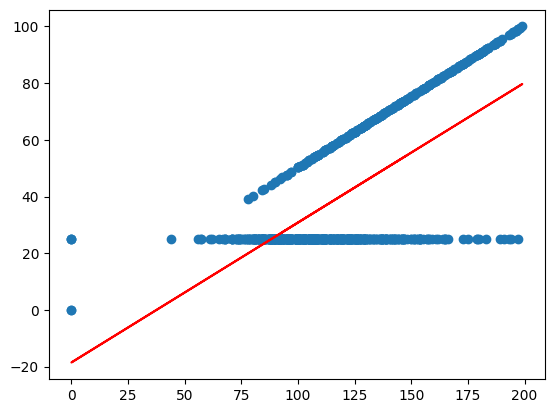

In [11]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color = 'red')
plt.show()

In [20]:
l= []
for i in range(100, 120):
    l.append(lr_model.predict([[float(i)]]))
for i in l:
    print(i[0])


[30.81147712]
[31.30522784]
[31.79897856]
[32.29272927]
[32.78647999]
[33.2802307]
[33.77398142]
[34.26773213]
[34.76148285]
[35.25523356]
[35.74898428]
[36.24273499]
[36.73648571]
[37.23023642]
[37.72398714]
[38.21773785]
[38.71148857]
[39.20523929]
[39.69899]
[40.19274072]


In [13]:
import pickle
pickle.dump(lr_model, open(r"C:\Users\ganes\OneDrive\Desktop\Medibuddy-Smart-Disease-Predictor-main\models\lr.pkl",'wb'))